<a href="https://colab.research.google.com/github/nohithborusu/nb/blob/main/Forest_Fire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Packages**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from tensorflow.keras import layers

**Reading Dataset**

In [ ]:
forestfires= pd.read_csv('forestfires (1).csv')
forestfires

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [ ]:
ff_dataset['area_log'] = np.where(ff_dataset['area'] ==  0, 0, np.log(ff_dataset['area']))
ff_dataset

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area_log
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,0.000000
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0.000000
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0.000000
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,0.000000
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,1.862529
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,3.994340
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,2.412336
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0.000000


In [ ]:
only_negs = ff_dataset.loc[ff_dataset['area_log'] < 0]
only_negs

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area_log
138,9,9,jul,tue,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,0.36,-1.021651
139,1,4,sep,tue,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,0.43,-0.843970
140,2,5,sep,mon,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,0.47,-0.755023
141,1,2,aug,wed,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,0.55,-0.597837
142,8,6,aug,fri,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,0.61,-0.494296
143,1,2,jul,sat,90.0,51.3,296.3,8.7,16.6,53,5.4,0.0,0.71,-0.342490
144,2,5,aug,wed,95.5,99.9,513.3,13.2,23.8,32,5.4,0.0,0.77,-0.261365
145,6,5,aug,thu,95.2,131.7,578.8,10.4,27.4,22,4.0,0.0,0.90,-0.105361
146,5,4,mar,mon,90.1,39.7,86.6,6.2,13.2,40,5.4,0.0,0.95,-0.051293
147,8,3,sep,tue,84.4,73.4,671.9,3.2,24.2,28,3.6,0.0,0.96,-0.040822


In [ ]:
target_dataset = ff_dataset.drop(['month', 'day', 'X', 'Y', 'area'], axis=1)
target_dataset

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area_log
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.000000
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.000000
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.000000
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.000000
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,1.862529
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,3.994340
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,2.412336
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.000000


In [ ]:
# for xgboost
XTarget, yLabel = target_dataset.iloc[:,:-1],target_dataset.iloc[:,-1]
print(XTarget)
print(yLabel)

     FFMC    DMC     DC   ISI  temp  RH  wind  rain
0    86.2   26.2   94.3   5.1   8.2  51   6.7   0.0
1    90.6   35.4  669.1   6.7  18.0  33   0.9   0.0
2    90.6   43.7  686.9   6.7  14.6  33   1.3   0.0
3    91.7   33.3   77.5   9.0   8.3  97   4.0   0.2
4    89.3   51.3  102.2   9.6  11.4  99   1.8   0.0
..    ...    ...    ...   ...   ...  ..   ...   ...
512  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0
513  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0
514  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0
515  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0
516  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0

[517 rows x 8 columns]
0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
512    1.862529
513    3.994340
514    2.412336
515    0.000000
516    0.000000
Name: area_log, Length: 517, dtype: float64


In [ ]:
# for xgboost
data_dmatrix = xgb.DMatrix(data=XTarget,label=yLabel)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(XTarget, yLabel, test_size=0.2, random_state=123)

In [ ]:
# using regressor since we are using regression against area
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[10:44:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

In [ ]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)


[10:44:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:44:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:44:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,1.491846,0.069692,1.490169,0.140751
1,1.476154,0.065672,1.481487,0.139786
2,1.465056,0.062774,1.473626,0.138738
3,1.456132,0.060965,1.468134,0.138954
4,1.448664,0.060441,1.462451,0.137806


In [ ]:
print((cv_results["test-rmse-mean"]).tail(1))

11    1.448758
Name: test-rmse-mean, dtype: float64


In [ ]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[10:44:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


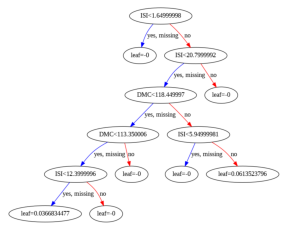

In [ ]:
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

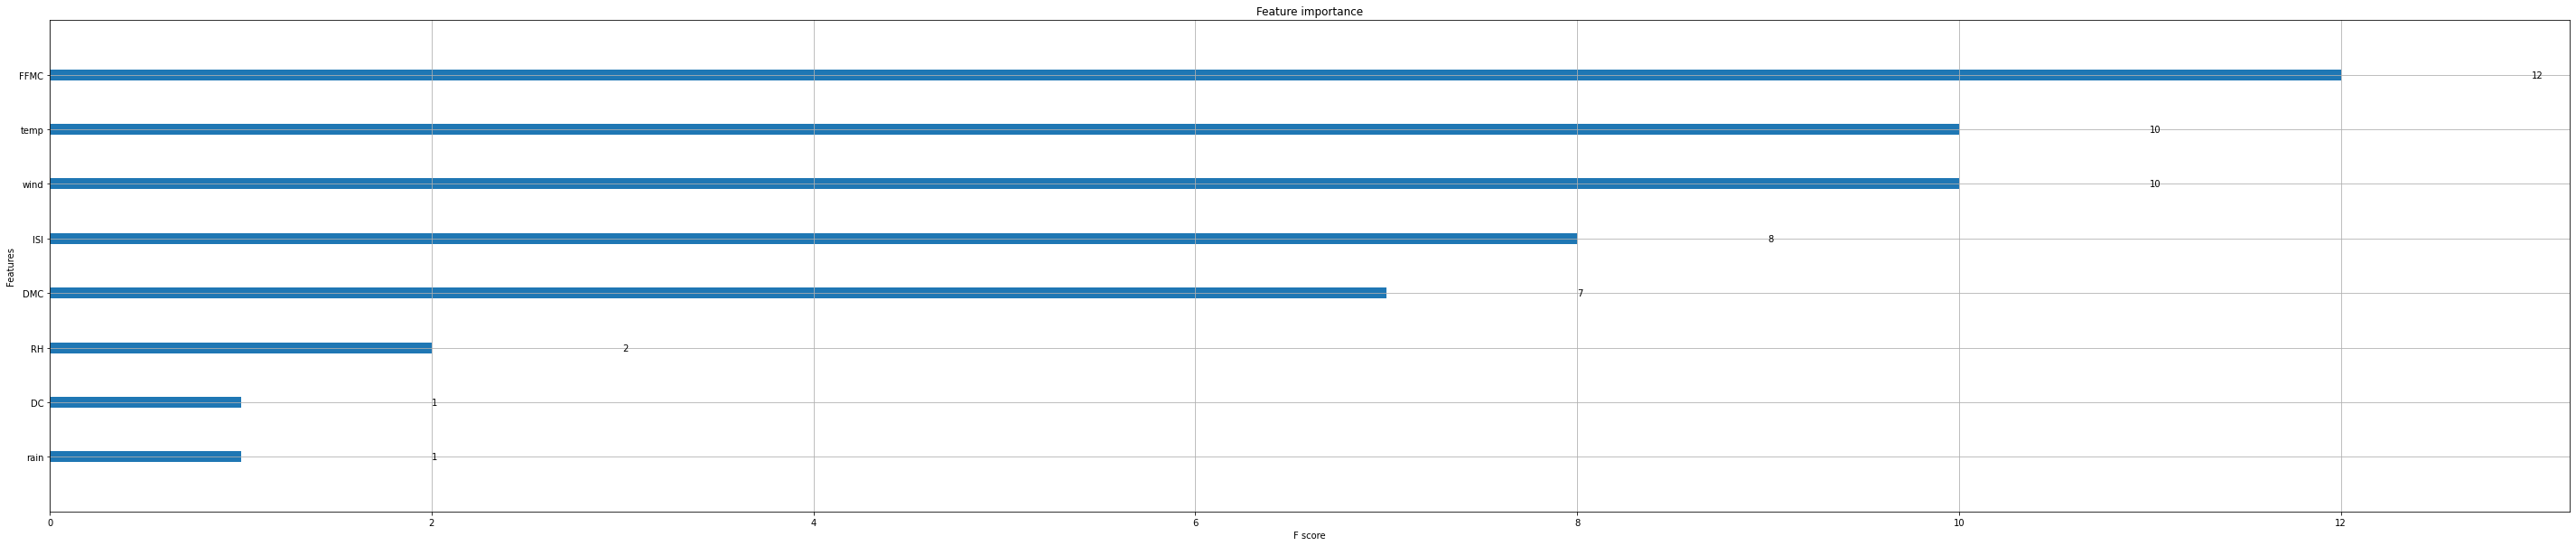

In [ ]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [ ]:
train_dataset = target_dataset.sample(frac=0.8, random_state=0)
test_dataset = target_dataset.drop(train_dataset.index)

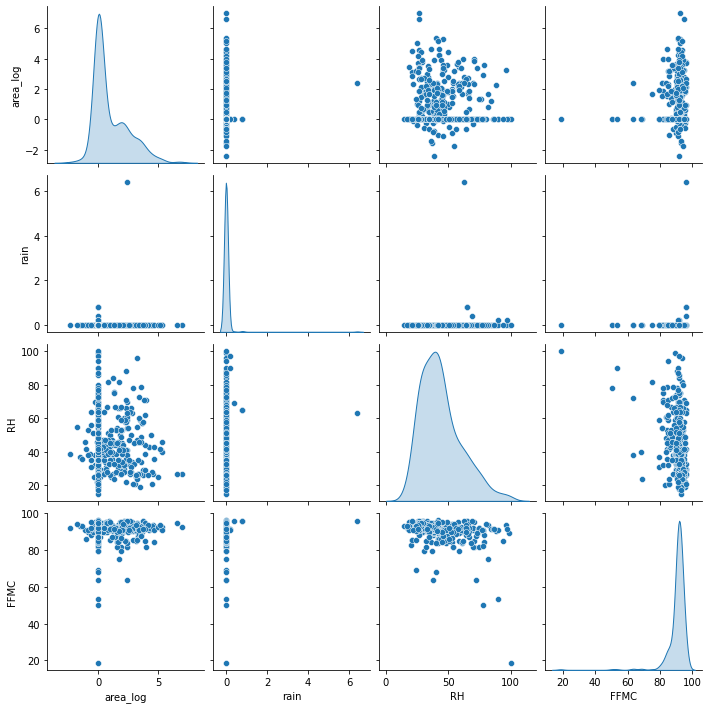

In [ ]:
sns.pairplot(train_dataset[['area_log', 'rain', 'RH', 'FFMC']], diag_kind='kde')


In [ ]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
FFMC,414.0,90.534300,5.965789,18.700000,90.200,91.70,92.900000,96.200000
DMC,414.0,109.481643,62.796135,1.100000,70.800,108.00,141.200000,291.300000
DC,414.0,541.928986,251.496567,7.900000,425.775,663.00,709.100000,860.600000
ISI,414.0,9.136957,4.760950,0.000000,6.500,8.40,11.075000,56.100000
temp,414.0,18.800000,5.857786,2.200000,15.400,19.15,22.800000,33.300000
RH,414.0,44.142512,16.491291,15.000000,32.000,41.00,53.000000,100.000000
wind,414.0,3.967874,1.739613,0.400000,2.700,4.00,4.900000,9.400000
rain,414.0,0.021256,0.320007,0.000000,0.000,0.00,0.000000,6.400000
area_log,414.0,0.975136,1.461350,-2.407946,0.000,0.00,1.883655,6.994703


In [ ]:
#train_dataset = train_dataset[train_dataset['area'] < 10]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd10769c730>]],
      dtype=object)

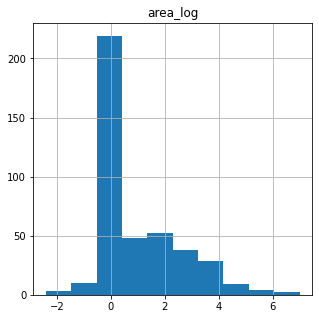

In [ ]:
train_dataset.hist(column='area_log')

In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('area_log')
test_labels = test_features.pop('area_log')

In [ ]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
FFMC,90.534300,5.965789
DMC,109.481643,62.796135
DC,541.928986,251.496567
ISI,9.136957,4.760950
temp,18.800000,5.857786
RH,44.142512,16.491291
wind,3.967874,1.739613
rain,0.021256,0.320007
area_log,0.975136,1.461350


In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [ ]:
normalizer.adapt(np.array(train_features))

In [ ]:
print(normalizer.mean.numpy())

[[9.0534309e+01 1.0948165e+02 5.4192896e+02 9.1369553e+00 1.8799999e+01
  4.4142506e+01 3.9678745e+00 2.1256037e-02]]


In [ ]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[ 87.6  52.2 103.8   5.   11.   46.    5.8   0. ]]

Normalized: [[-0.49 -0.91 -1.74 -0.87 -1.33  0.11  1.05 -0.07]]


In [ ]:
dmc = np.array(train_features['DMC'])

dmc_normalizer = layers.Normalization(input_shape=[1,], axis=None)
dmc_normalizer.adapt(dmc)

In [ ]:
dmc_model = tf.keras.Sequential([
    dmc_normalizer,
    layers.Dense(units=1)
])

dmc_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [ ]:
dmc_model.predict(dmc[:10])

1/1 [==============================] - 0s 114ms/step


array([[ 1.2768127 ],
       [ 0.5523851 ],
       [-0.45958483],
       [-0.530913  ],
       [ 0.4253315 ],
       [-0.70700455],
       [ 1.3236219 ],
       [-0.7092336 ],
       [-1.88615   ],
       [ 2.2620342 ]], dtype=float32)

In [ ]:
dmc_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
%%time
history = dmc_model.fit(
    train_features['DMC'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 4.97 s, sys: 219 ms, total: 5.19 s
Wall time: 10.7 s


In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,1.083022,0.989671,95
96,1.079644,0.984239,96
97,1.083844,0.985962,97
98,1.081654,0.983012,98
99,1.085652,1.002607,99


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 5])
  plt.xlabel('Epoch')
  plt.ylabel('Error [DMC]')
  plt.legend()
  plt.grid(True)

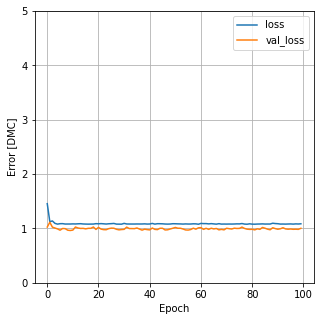

In [ ]:
plot_loss(history)

In [ ]:
test_results = {}

test_results['dmc_model'] = dmc_model.evaluate(
    test_features['DMC'],
    test_labels, verbose=0)

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = dmc_model.predict(x)


8/8 [==============================] - 0s 2ms/step


In [ ]:
def plot_dmc(x, y):
  plt.scatter(train_features['DMC'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('DMC')
  plt.ylabel('area')
  plt.legend()


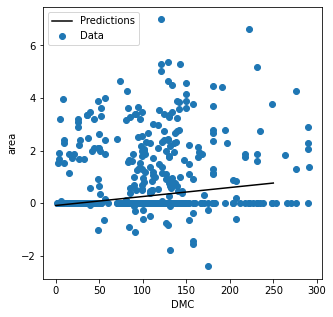

In [ ]:
plot_dmc(x, y)

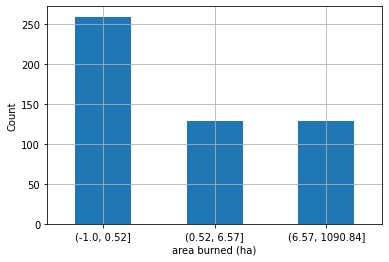

In [ ]:
forestfires['area_categories'] = pd.cut(forestfires['area'], bins=[-1.0, 0.52, 6.57, 1090.84])

forestfires['area_categories'].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.ylabel('Count')
plt.xlabel('area burned (ha)')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Create a stratified train and test set based on area category
strat_train_set, strat_test_set = train_test_split(forestfires, test_size=0.2, stratify=forestfires['area_categories'], random_state=42)

In [ ]:
forestfires['area_categories'].value_counts() / len(forestfires)

(-1.0, 0.52]       0.500967
(0.52, 6.57]       0.249516
(6.57, 1090.84]    0.249516
Name: area_categories, dtype: float64

In [ ]:
strat_test_set['area_categories'].value_counts() / len(strat_test_set)

(-1.0, 0.52]       0.50
(0.52, 6.57]       0.25
(6.57, 1090.84]    0.25
Name: area_categories, dtype: float64

In [ ]:
forestfires = strat_train_set.copy()


In [ ]:
forestfires['log_area'] = np.log(forestfires['area'] + 1)

In [ ]:
# Create new column 'burned'. 0 if area = 0.0, else 1
forestfires['burned'] = forestfires['area'].apply(lambda x: 0.0 if x == 0.0 else 1.0)

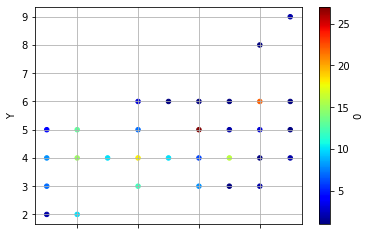

In [ ]:
# Get all forest fires where burned is 1
forestfires_burned = forestfires[forestfires['burned'] != 0.0]

# Group the forestfires by their X and Y coordinate, get the count of how many are in each point, and reset the index so that we can plot it by the X and Y
forestfires_burned_count = forestfires_burned.groupby(['X', 'Y']).size().reset_index()
forestfires_burned_count.plot(kind='scatter', x='X', y='Y', grid=True, c=0, cmap='jet', colorbar=True, legend=True)
plt.show()


In [ ]:
forestfires = forestfires.drop('burned', axis=1)


In [ ]:
forestfires.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [ ]:
forestfires.duplicated().sum()

1

In [ ]:
forestfires=forestfires.drop_duplicates()

In [ ]:
correlation = forestfires.corr()
correlation['area'].sort_values(ascending=False)

area        1.000000
log_area    0.521910
temp        0.108162
DMC         0.088377
DC          0.062433
X           0.055048
FFMC        0.049271
Y           0.046656
ISI         0.016000
wind        0.007647
rain       -0.006816
RH         -0.097088
Name: area, dtype: float64

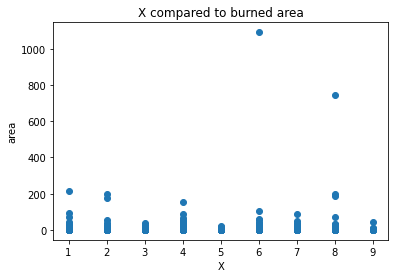

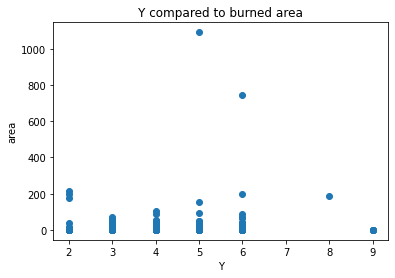

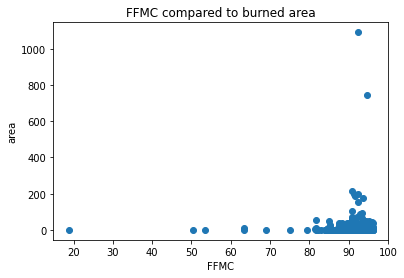

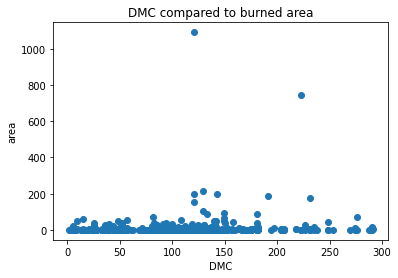

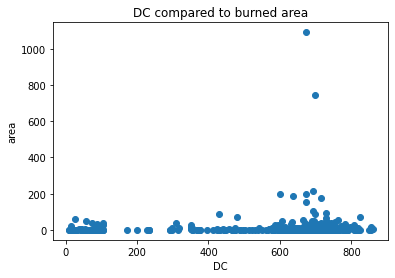

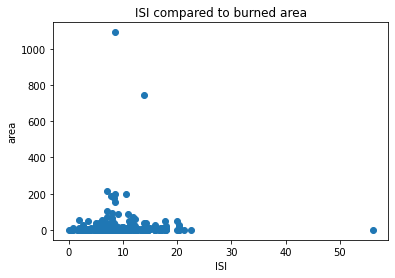

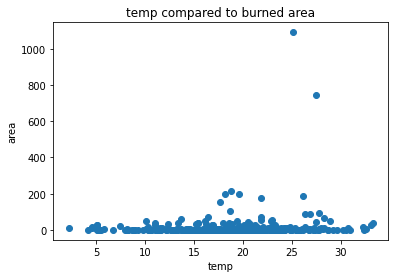

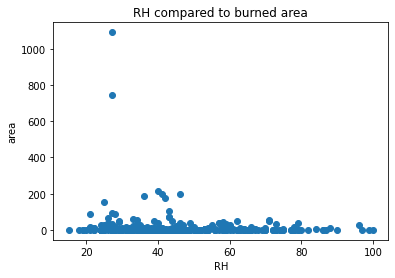

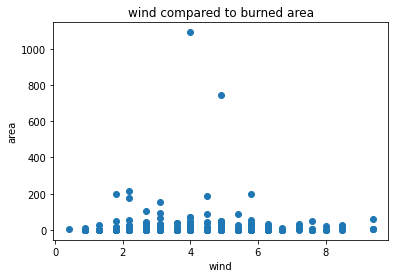

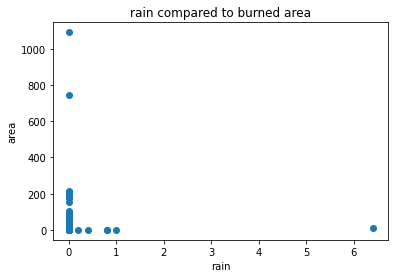

In [ ]:
columns = ['X', 'Y','FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']
for column in columns:
    plt.scatter(forestfires[column], forestfires['area'])
    plt.title(column + ' compared to burned area')
    plt.xlabel(column)
    plt.ylabel('area')
    plt.show()

In [ ]:
correlation = forestfires.corr()
correlation['log_area'].sort_values(ascending=False)

log_area    1.000000
area        0.521910
DC          0.122051
temp        0.120139
DMC         0.113796
FFMC        0.086796
wind        0.037787
X           0.032049
rain        0.026218
ISI         0.024660
Y           0.005407
RH         -0.100301
Name: log_area, dtype: float64

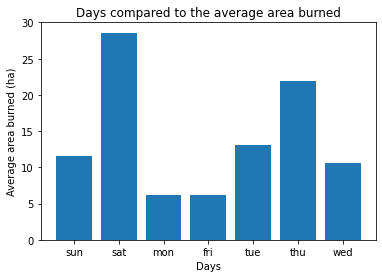

In [ ]:
days = forestfires['day'].unique()
avg_area_days = []
for day in days:
    avg_area_days.append(forestfires[forestfires['day'] == day]['area'].mean())

plt.bar(days, avg_area_days)
plt.title('Days compared to the average area burned')
plt.xlabel('Days')
plt.ylabel('Average area burned (ha)')
plt.show()

In [ ]:
months = list(forestfires['month'].unique())

In [ ]:
drop_months = ['may', 'jan', 'dec', 'apr']
forestfires = forestfires[forestfires['month'].isin(drop_months) == False]

# find the average area burned for each month
months = list(forestfires['month'].unique())
avg_area_month = []
for month in months:
    avg_area_month.append(forestfires[forestfires['month'] == month]['area'].mean())


In [ ]:
forestfires = strat_train_set
forestfires['area'] = np.log(forestfires['area'] + 1)
strat_test_set['area'] = np.log(strat_test_set['area'] + 1)
forestfires.drop(columns='area_categories', inplace=True)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# create a pipeline that uses OneHotEncoder to transform the cat_columns and MinMaxScaler on the num_columns
num_columns = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']
cat_columns = ['month', 'day']
preprocessing = ColumnTransformer([
    ('cat', OneHotEncoder(), cat_columns),
    ('minmax', MinMaxScaler(), num_columns)
])

In [ ]:
X_train = preprocessing.fit_transform(forestfires.drop(columns='area'))
y_train = forestfires['area']

X_test = preprocessing.fit_transform(strat_test_set.drop(columns='area'))
y_test = strat_test_set['area']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

predictions = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(mse)

1.930597728678524


In [ ]:
orig_mse = np.exp(mse) - 1
print(orig_mse)

5.893629530419564


In [ ]:
predictions

array([-0.0625  ,  0.609375,  1.3125  ,  0.484375,  0.234375, -0.25    ,
        0.171875,  1.25    ,  0.875   ,  1.21875 ,  1.015625,  1.5     ,
        1.71875 ,  2.484375,  1.09375 ,  0.765625,  0.84375 ,  0.359375,
        1.421875,  1.359375,  0.359375,  0.828125,  1.34375 ,  1.21875 ,
        1.15625 ,  0.671875,  1.53125 ,  2.1875  ,  0.734375,  1.6875  ,
        0.71875 ,  1.640625,  1.3125  ,  0.390625,  1.078125,  0.9375  ,
        0.265625,  2.109375,  1.015625,  0.921875,  1.3125  ,  1.078125,
        0.59375 ,  0.859375,  0.609375,  0.765625,  1.296875,  0.6875  ,
        1.703125,  0.859375,  2.140625,  1.125   ,  1.484375,  1.359375,
        1.671875,  0.4375  ,  1.      ,  1.5     ,  1.609375,  0.96875 ,
        0.140625,  2.84375 ,  1.875   ,  1.15625 ,  1.5625  , -0.390625,
        1.609375,  0.59375 ,  1.6875  ,  1.703125,  1.78125 ,  0.859375,
        0.234375,  0.171875,  1.296875,  0.96875 ,  0.1875  ,  0.90625 ,
        1.1875  ,  1.890625,  1.      ,  0.5     , 

In [ ]:
y_pred=predictions

In [ ]:

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))



MAE: 1.089754328370124
MSE: 1.930597728678524
RMSE: 1.3894595095498552
VarScore: -0.10806969533960475


<ipython-input-33-879cd6cfceec>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


<Axes: xlabel='area', ylabel='Density'>

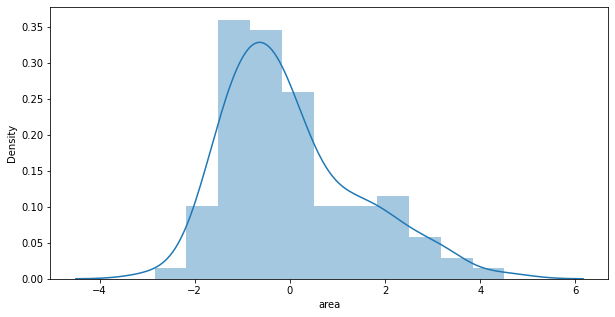

In [ ]:
fig = plt.figure(figsize=(10,5))
residuals = (y_test-predictions)
sns.distplot(residuals)